In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF' ])


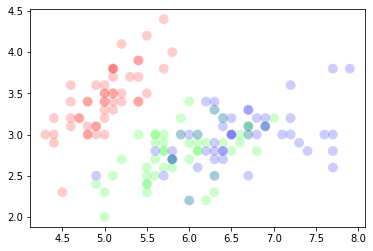

In [111]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #, random_state=151

# show input data
plt.figure()
plt.scatter(X[:, 0], X[:,1], c=y, cmap=cmap, edgecolor='w', s=100, alpha=0.2)
plt.show()

In [112]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN:
    
    def __init__(self, k):
        self.k = k;
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
    
    def _predict(self, x):
        # compute the distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
        # get the k nearest samples and their labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority vote, most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
        
        
        

In [107]:
a = [1, 1, 2, 3, 1, 1, 5, 3, 1, 1]
most_common = Counter(a).most_common(1)
print(most_common[0][0])
print(np.argsort(a)[:9])


1
[0 1 4 5 8 9 2 3 7]


In [121]:
clf = KNN(k=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = np.mean(predictions==y_test)
print(accuracy)


0.9
